In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Handling Missing values

In [3]:
missing = [feat for feat in df.columns  if df[feat].isnull().sum()>1]

for feat in missing:
    print(f'{feat} -> {np.round(df[feat].isnull().mean(),4)} ')

height_m -> 0.025 
percentage_male -> 0.1223 
type2 -> 0.4794 
weight_kg -> 0.025 


In [9]:
df.fillna({
    'height_m': df['height_m'].median(),
    'percentage_male': df['percentage_male'].median(),
    'type2': 'missing',
    'weight_kg': df['weight_kg'].median()
},inplace=True)

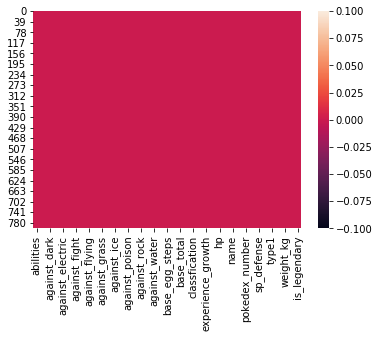

In [10]:
sns.heatmap(df.isnull())

In [12]:
# Droping Usless value

In [19]:
df.drop(['abilities','japanese_name','name','classfication'],axis=1,inplace=True)

In [22]:
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,grass,poison,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,grass,poison,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,grass,poison,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,fire,missing,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,fire,missing,19.0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [24]:
df['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
150                           7
235                           7
50                            7
100                           6
140                           6
127                           5
70                            4
125                           3
55                            3
65                            3
80                            2
170                           2
220                           2
130                           2
15                            2
160                           1
155                           1
35                            1
30 (Mete

In [30]:
df.loc[df['capture_rate']=='30 (Meteorite)255 (Core)','capture_rate'] = 30

In [33]:
df['capture_rate']=df['capture_rate'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()
df['type1'] = lable.fit_transform(df['type1'])
df['type2'] = lable.fit_transform(df['type2'])

In [40]:
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,9,14,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,9,14,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,9,14,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,6,12,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,6,12,19.0,1,0


# Inbalance Data Set

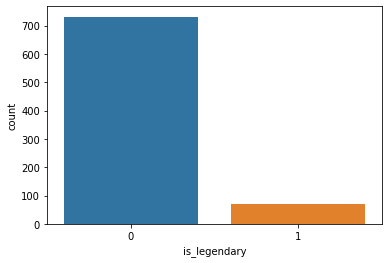

In [42]:
sns.countplot(df['is_legendary'])

In [45]:
Yes = df[df['is_legendary']==1]
No= df[df['is_legendary']==0]

Yes.shape  , No.shape

((70, 37), (731, 37))

It is Imbalance data set means that dependent variable are not properly distributes 

# Over - Sampling

over sampling will add more rows of categories which has less categories label and make same to max categories label 

In [53]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('is_legendary',axis=1)
y = df['is_legendary']

os = RandomOverSampler()
X_res,y_res = os.fit_sample(X,y)

In [54]:
X_res.shape, y_res.shape

((1462, 36), (1462,))

In [55]:
from collections import Counter

print(f'Original dataset -> {Counter(y)}')
print()
print(f'Resampled dataset -> {Counter(y_res)}')

Original dataset -> Counter({0: 731, 1: 70})

Resampled dataset -> Counter({0: 731, 1: 731})


# Feature Scaling 

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_feat = scaler.fit_transform(X_res)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

#  Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

lg = LogisticRegression()
lg.fit(X_train,y_train)

lg_predict = lg.predict(X_test)


print(confusion_matrix(y_test,lg_predict))
print()
print(classification_report(y_test,lg_predict))
print()
print(accuracy_score(y_test,lg_predict))

[[231  11]
 [ 10 231]]

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       242
           1       0.95      0.96      0.96       241

    accuracy                           0.96       483
   macro avg       0.96      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483


0.9565217391304348


# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_predict = rf.predict(X_test)


print(confusion_matrix(y_test,rf_predict))
print()
print(classification_report(y_test,rf_predict))
print()
print(accuracy_score(y_test,rf_predict))

[[241   1]
 [  0 241]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00       241

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483


0.9979296066252588


# For This problem Random Forest is perfect